In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import os
from sqlalchemy import create_engine
import seaborn as sns
import datetime as dt
sns.set()

In [18]:
color_y ='#0B3E7E'
color_r = '#920D03'
color_b = '#0B7A50'
redye = [color_r, color_y, color_b]

In [3]:
driver = 'mysql+pymysql:'
user = 'root'
password = '19693903'
ip = '127.0.0.1'
database = 'project_4'

In [4]:
connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

In [5]:
query = """
SELECT *
FROM flights
"""

In [6]:
query2 = """
SELECT * FROM airports
"""

In [9]:
airports_info = pd.read_sql(query2, engine)
flights = pd.read_sql(query, engine)

In [10]:
data = flights.merge(airports_info, left_on = 'depart_airpt', right_on='iata_code')

In [11]:
data = data.drop(columns = ('iata_code'), axis = 1).rename(columns = {'country_code':'depart_country'})
data = data.astype({'depart_delay': int,'arri_delay':int})
data['Total_delay'] = data['depart_delay'] + data['arri_delay']
data.head()

,airln_name,airln_code,type,codeshared,status,icaonumb,flight,depart_terminal,depart_gate,depart_airpt,schd_depart_time,depart_delay,arri_airpt,schd_arri_time,arri_delay,depart_country,name,Total_delay
0,Binter Canarias,NT,departure,None,landed,IBB503,503,2,3,ACE,2019-07-25 07:00:00,0,LPA,2019-07-25 07:45:00,0,ES,Lanzarote,0
1,Ryanair,FR,departure,None,landed,RYR1345,1345,1,2,ACE,2019-07-25 07:45:00,0,SNN,2019-07-25 11:40:00,0,ES,Lanzarote,0
2,Binter Canarias,NT,departure,None,landed,IBB501,501,2,4,ACE,2019-07-25 08:15:00,0,LPA,2019-07-25 09:00:00,0,ES,Lanzarote,0
3,Ryanair,FR,departure,None,landed,RYR3547,3547,1,4,ACE,2019-07-25 08:20:00,0,MAD,2019-07-25 11:55:00,0,ES,Lanzarote,0
4,Binter Canarias,NT,departure,Canarias Airlines,landed,IBB453,453,2,3,ACE,2019-07-25 08:25:00,0,TFN,2019-07-25 09:15:00,0,ES,Lanzarote,0


## Distributions and summary statistics

#### Distribution of departure and arrival delays

In [12]:
## Filtering the data to obtain only Spain observations

data_bcn = data[data['depart_airpt'] == 'BCN']

In [16]:
bnc_delays =  data_bcn[np.logical_and(data_bcn['depart_delay']>0, data_bcn['arri_delay']>0)]

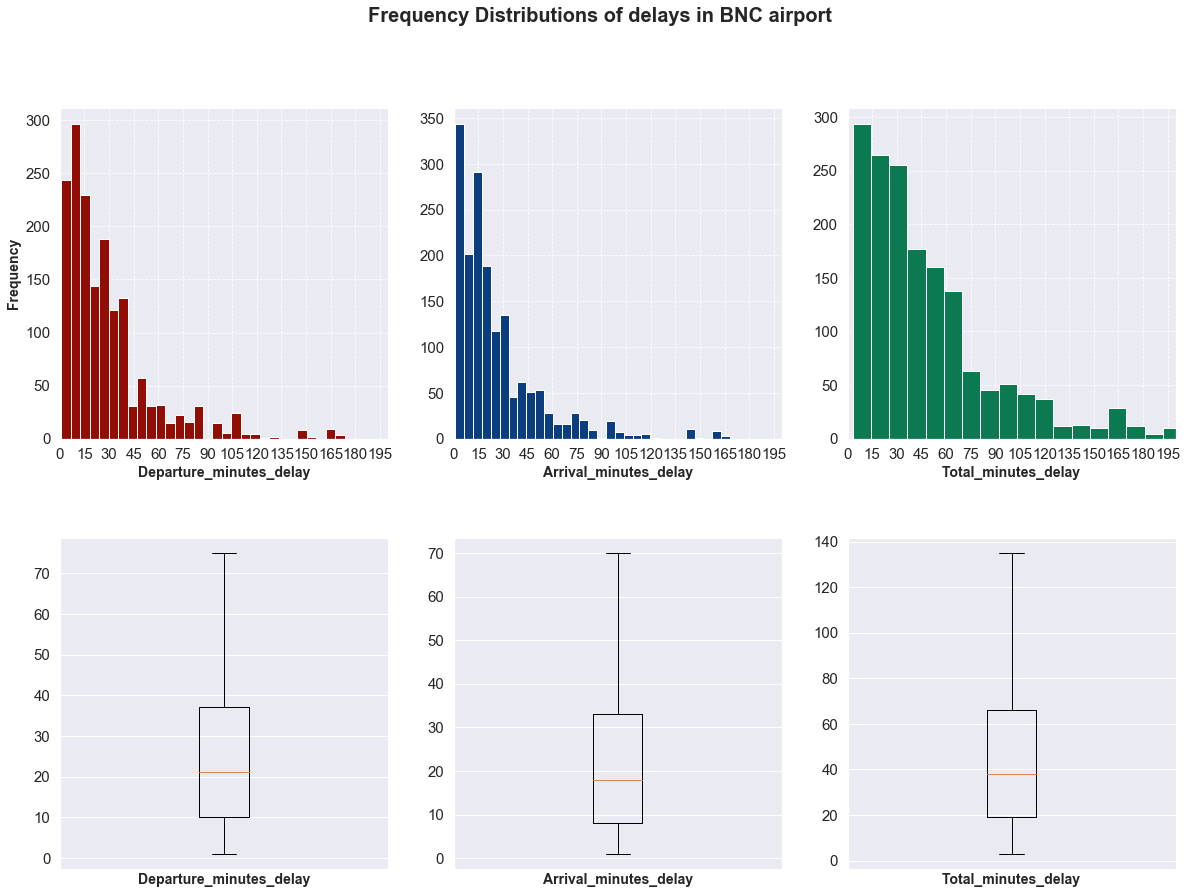

In [19]:
fig, [ax1, ax2] = plt.subplots(2,3, figsize=[20,14])
fig.subplots_adjust(hspace=0.3)
fig.suptitle('Frequency Distributions of delays in BNC airport', fontweight = 900, fontsize = 20)

ax1[0].hist(bnc_delays.depart_delay,bins=40, color=color_r)
ax1[0].set_xlabel('Departure_minutes_delay',fontweight = 900, fontsize = 14)
ax1[0].set_ylabel('Frequency',fontweight = 900, fontsize = 14)
ax1[0].grid(linestyle='--', linewidth=0.8)
ax1[0].set_xlim([0, 200])
ax1[0].tick_params(axis="x", labelsize=15)
ax1[0].tick_params(axis="y", labelsize=15)
ax1[0].set_xticks(np.arange(0, 200,15))

ax1[1].hist(bnc_delays.arri_delay, bins=40, color=color_y)
ax1[1].set_xlabel('Arrival_minutes_delay',fontweight = 900, fontsize = 14)
ax1[1].grid(linestyle='--', linewidth=0.8)
ax1[1].set_xlim([0, 200])
ax1[1].tick_params(axis="x", labelsize=15)
ax1[1].tick_params(axis="y", labelsize=15)
ax1[1].set_xticks(np.arange(0, 200,15))

ax1[2].hist(bnc_delays.Total_delay, bins=40, color=color_b)
ax1[2].set_xlabel('Total_minutes_delay',fontweight = 900, fontsize = 14)
ax1[2].grid(linestyle='--', linewidth=0.8)
ax1[2].set_xlim([0, 200])
ax1[2].tick_params(axis="x", labelsize=15)
ax1[2].tick_params(axis="y", labelsize=15)
ax1[2].set_xticks(np.arange(0, 200,15))

ax2[0].boxplot(bnc_delays.depart_delay, bootstrap=10000, meanline = True,showfliers=False)
ax2[0].set_xlabel('Departure_minutes_delay',fontweight = 900, fontsize = 14)
ax2[0].set_xticks([])
ax2[0].tick_params(axis="x", labelsize=15)
ax2[0].tick_params(axis="y", labelsize=15)

ax2[1].boxplot(bnc_delays.arri_delay, bootstrap=10000, meanline = True,showfliers=False)
ax2[1].set_xlabel('Arrival_minutes_delay',fontweight = 900, fontsize = 14)
ax2[1].set_xticks([])
ax2[1].tick_params(axis="x", labelsize=15)
ax2[1].tick_params(axis="y", labelsize=15)

ax2[2].boxplot(bnc_delays.Total_delay, bootstrap=10000, meanline = True,showfliers=False)
ax2[2].set_xlabel('Total_minutes_delay',fontweight = 900, fontsize = 14)
ax2[2].set_xticks([])
ax2[2].tick_params(axis="x", labelsize=15)
ax2[2].tick_params(axis="y", labelsize=15)

plt.show()

In [20]:
bnc_delays.describe()

,depart_delay,arri_delay,Total_delay
count,1676.000000,1676.000000,1676.000000
mean,29.449284,26.661098,56.110382
std,30.754150,29.383471,59.328866
min,1.000000,1.000000,3.000000
25%,10.000000,8.000000,19.000000
50%,21.000000,18.000000,38.000000
75%,37.000000,33.000000,66.000000
max,231.000000,217.000000,448.000000


In [21]:
bnc_dep_delay_mean = bnc_delays.depart_delay.mean()
bnc_dep_delay_std = bnc_delays.depart_delay.std()
bnc_dep_delay_var = bnc_delays.depart_delay.var()

bnc_arrv_delay_mean = bnc_delays.arri_delay.mean()
bnc_arrv_delay_std = bnc_delays.arri_delay.std()
es_arrv_delay_var = bnc_delays.arri_delay.var()

bnc_total_delay_mean = bnc_delays.Total_delay.mean()
bnc_total_delay_std = bnc_delays.Total_delay.std()
bnc_total_delay_var = bnc_delays.Total_delay.var()

### Distributions of flights during the day in BNC

In [23]:
depart_hours = data_bcn['schd_depart_time'].dt.hour
arri_hours = data_bcn['schd_arri_time'].dt.hour

df_hours_bcn = pd.DataFrame([depart_hours, arri_hours])
df_hours_bcn = df_hours_bcn.transpose()

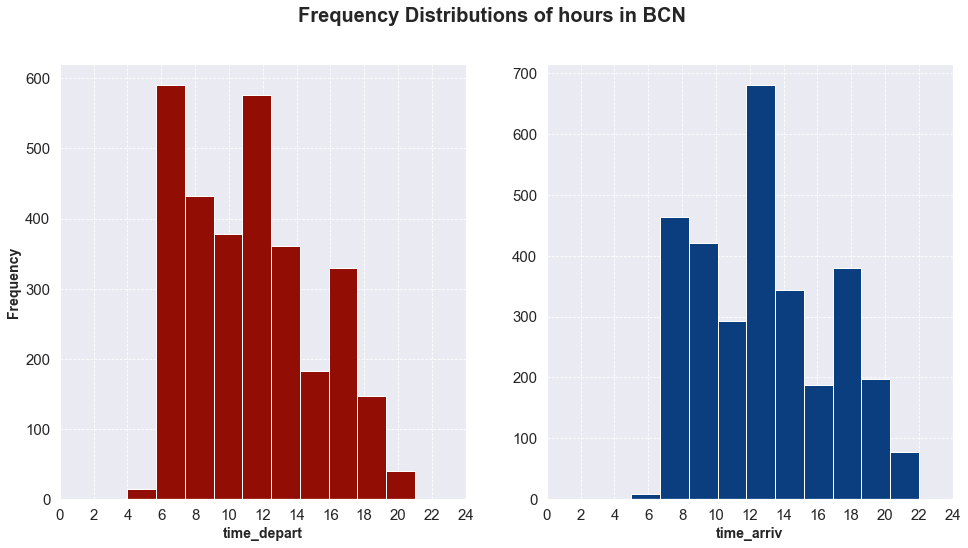

In [24]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=[16,8])
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Frequency Distributions of hours in BCN', fontweight = 900, fontsize = 20)

ax1.hist(depart_hours, color=color_r)
ax1.set_xlabel('time_depart',fontweight = 900, fontsize = 14)
ax1.set_ylabel('Frequency',fontweight = 900, fontsize = 14)
ax1.grid(linestyle='--', linewidth=0.8)
ax1.set_xticks(np.arange(0, 26,2))
ax1.tick_params(axis="y", labelsize=15)
ax1.tick_params(axis="x", labelsize=15)

ax2.hist(arri_hours,color=color_y)
ax2.set_xlabel('time_arriv',fontweight = 900, fontsize = 14)
ax2.grid(linestyle='--', linewidth=0.8)
ax2.set_xticks(np.arange(0, 26,2))
ax2.tick_params(axis="y", labelsize=15)
ax2.tick_params(axis="x", labelsize=15)
plt.show()

### Airlines flights distributions in BNC

In [57]:
bcn_airlines = data_bcn.groupby('airln_name').count()

In [58]:
bcn_airlines = bcn_airlines.sort_values(by=['airln_code'],ascending=False).drop(bcn_airlines.iloc[:,1:], axis=1).\
rename(columns = {'airln_code':'total_count'}).reset_index(drop=False)

In [59]:
bcn_airlines = bcn_airlines[bcn_airlines['total_count']>50]

In [60]:
bcn_airlines['per'] = bcn_airlines['total_count'] / bcn_airlines['total_count'].sum()

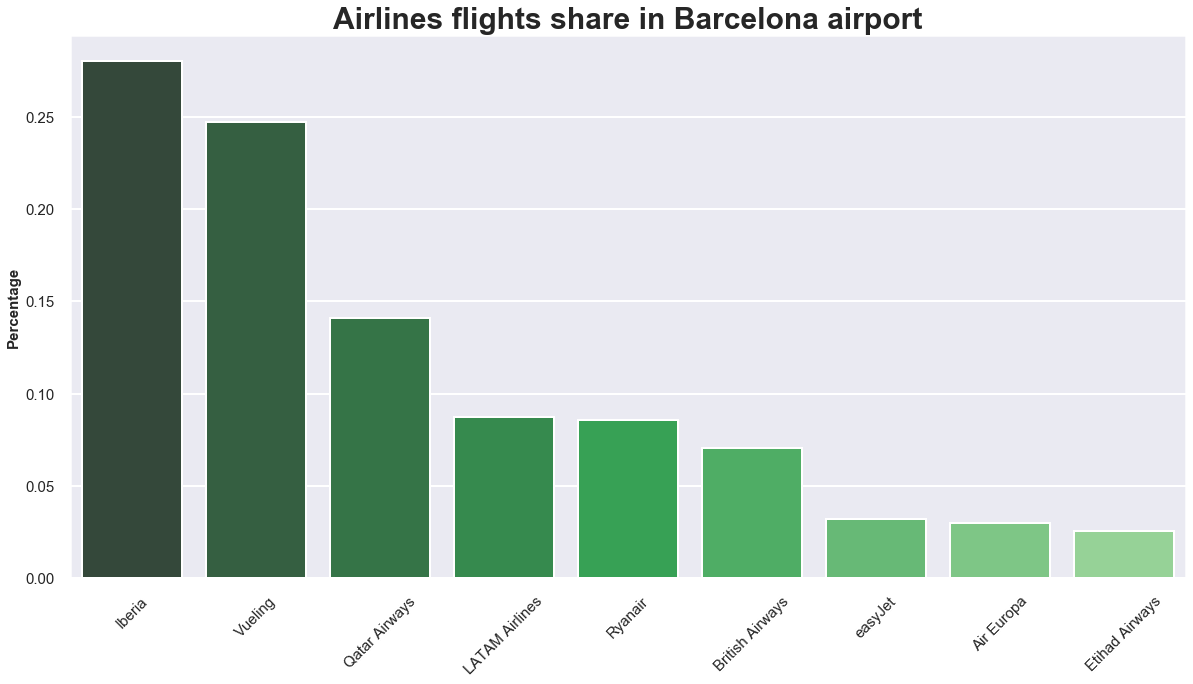

<Figure size 864x864 with 0 Axes>

In [63]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1 = sns.barplot(bcn_airlines.airln_name, bcn_airlines.per, palette='Greens_d', saturation=2)
plt.title("Airlines flights share in Barcelona airport",  fontweight = 900, fontsize = 30)
plt.ylabel('Percentage',  fontweight = 900, fontsize = 15)
plt.xlabel(None)

plt.xticks(fontsize = 15, rotation=45)
plt.yticks(fontsize = 15)
plt.figure(figsize=(12,12))

sns.set_context("poster")

## Delays by weekday

In [65]:
import datetime as dt

dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
data_bcn['weekday'] = data_bcn['schd_depart_time'].dt.dayofweek.map(dayOfWeek)

/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [66]:
bcn_delay_day = data_bcn.groupby('weekday').mean().reset_index(drop=False)

In [67]:
tidy = bcn_delay_day.melt(id_vars='weekday').rename(columns=str.title)
tidy.columns = ['Weekday', 'Type', 'Mean delay time']

In [68]:
weekday_delays = data_bcn[['weekday', 'depart_delay', 'arri_delay','Total_delay']]
weekday_delays = weekday_delays[np.logical_and(weekday_delays['depart_delay']>0, weekday_delays['arri_delay']>0)]

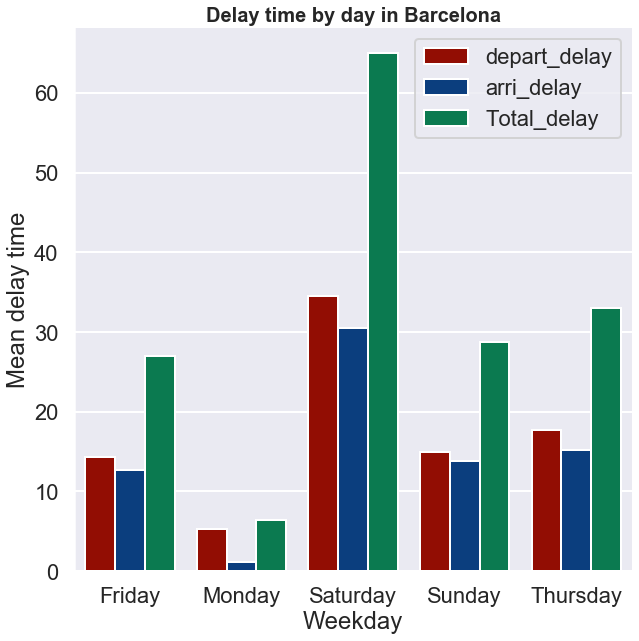

In [69]:
fig, ax1 = plt.subplots(figsize=(10,10))
sns.barplot(x='Weekday', y='Mean delay time', hue='Type', data=tidy, ax=ax1, palette=redye, saturation=1)
plt.title('Delay time by day in Barcelona',fontweight = 900, fontsize = 20)
plt.legend()
sns.despine(fig)

In [70]:
tidy_2 = weekday_delays.melt(id_vars='weekday').rename(columns=str.title)
tidy_2.columns = ['Weekday', 'Type', 'Delay in minutes']

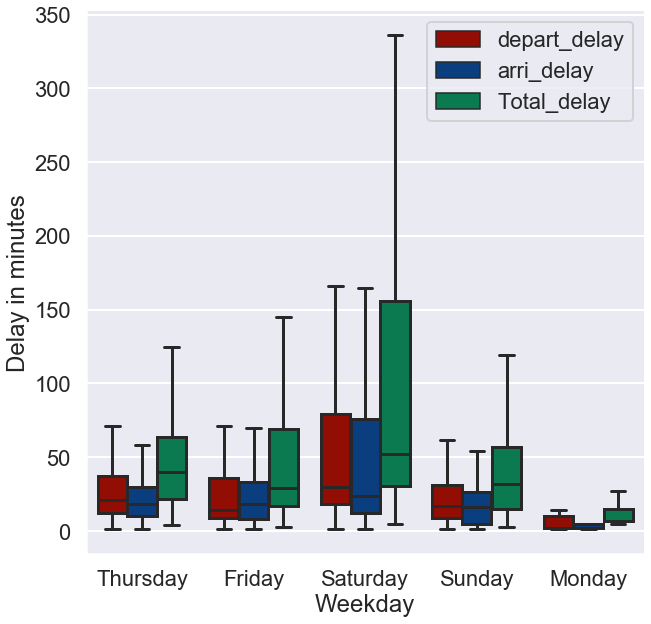

In [71]:
fig, ax1 = plt.subplots(figsize=(10,10))
ax = sns.boxplot(x='Weekday', y='Delay in minutes', hue='Type',ax=ax1,
                 data=tidy_2, palette=redye,showfliers=False, saturation = 1)

ax.legend()
sns.despine(fig)
plt.show()

## Relation between minutes of delay and day time

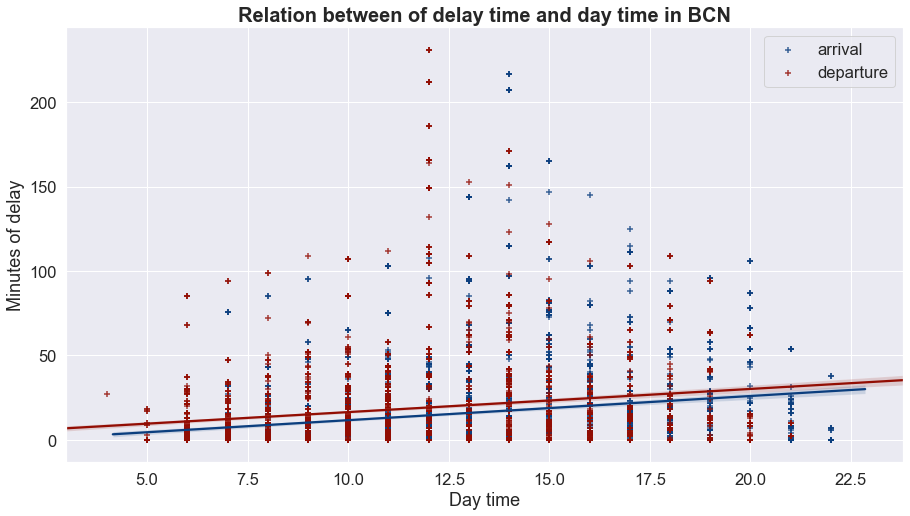

In [72]:
sns.set(font_scale=1.5)
fig,ax = plt.subplots(figsize=(15,8))
ax1 = sns.regplot(arri_hours, data_bcn.arri_delay, fit_reg=True, color=color_y,marker="+", label='arrival')
ax2 =sns.regplot(depart_hours, data_bcn.depart_delay, fit_reg=True, color=color_r, marker="+", label='departure')
ax1.set(ylabel='Minutes of delay', xlabel='Day time')
plt.title('Relation between of delay time and day time in BCN',fontweight = 900, fontsize = 20)
ax.legend()
plt.show()

### Relation between delay in departures and total delay

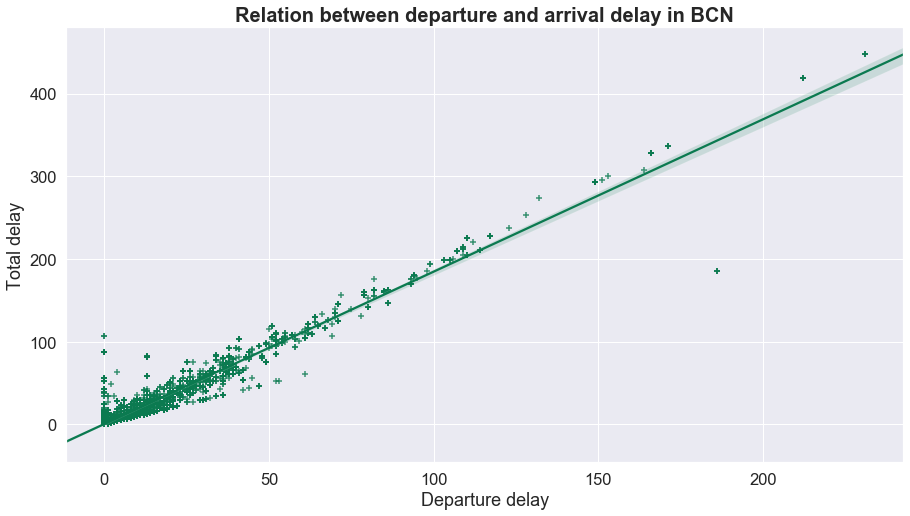

In [73]:
sns.set(font_scale=1.5)
fig,ax = plt.subplots(figsize=(15,8))
ax1 =sns.regplot(data_bcn.depart_delay, data_bcn.Total_delay, fit_reg=True, color=color_b, marker="+")
ax1.set(ylabel='Total delay', xlabel='Departure delay')
plt.title('Relation between departure and arrival delay in BCN',fontweight = 900, fontsize = 20)
plt.show()

### Delay time for the airlines with more flights

In [74]:
query2 = '''
SELECT airln_name, AVG(depart_delay) AS mean_depart_delay, AVG(arri_delay) AS mean_arriv_delay
FROM flights
WHERE airln_name IN ('Iberia', 'Vueling', 'Ryanair', 'Qatar Airways', 'Air Europe', 'easyJet', 'Etihad Airways')
AND depart_airpt = 'BCN'
GROUP BY airln_name
ORDER BY mean_depart_delay DESC

'''

In [76]:
bcn_airlines_delays_top = pd.read_sql(query2, engine)

In [77]:
bcn_airlines_delays_top['Total_mean_delay'] = bcn_airlines_delays_top['mean_depart_delay'] + \
                        bcn_airlines_delays_top['mean_arriv_delay']

In [78]:
tidy_4 = bcn_airlines_delays_top.melt(id_vars='airln_name').rename(columns=str.title)

In [81]:
#Worst airlines in Spain filter by delays

bcn_airlines_delays = data_bcn.groupby('airln_name').mean().reset_index(drop=False)
bcn_airlines_delays_worst = bcn_airlines_delays[np.logical_and(bcn_airlines_delays['depart_delay']>40, \
                                                       bcn_airlines_delays['arri_delay']>40)]

bcn_airlines_delays_worst = bcn_airlines_delays_worst.sort_values(by='depart_delay', ascending=False)
tidy_3 = bcn_airlines_delays_worst.melt(id_vars='airln_name').rename(columns=str.title)


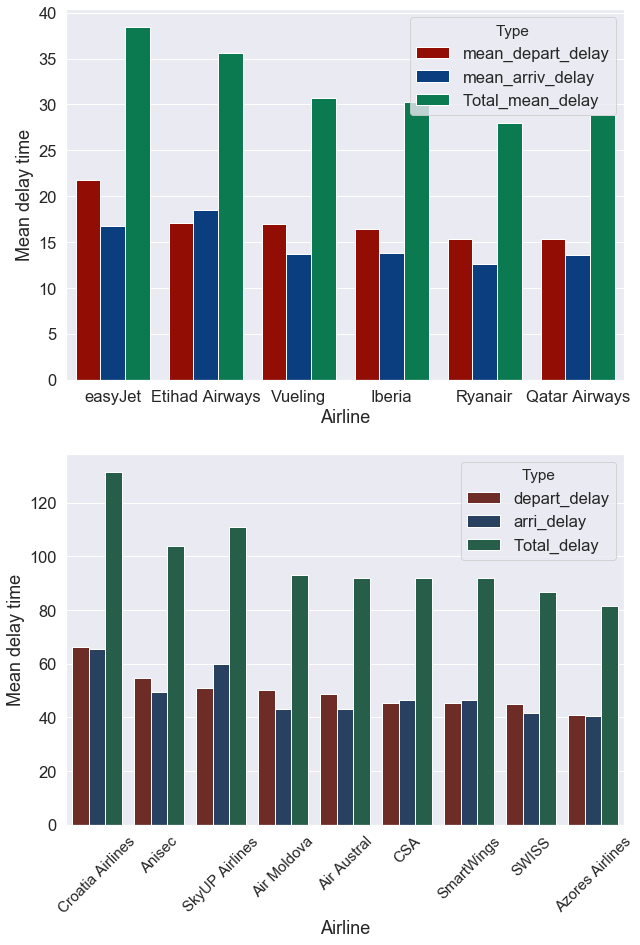

In [82]:
fig, [ax1, ax2] = plt.subplots(2,1,figsize=(10,15))
fig.subplots_adjust(hspace=0.2)

tidy_4.columns = ['Airline', 'Type', 'Mean delay time']
tidy_3.columns = ['Airline', 'Type', 'Mean delay time']
sns.barplot(x='Airline', y='Mean delay time', hue='Type', data=tidy_4, ax=ax1, palette=redye, saturation=1)
sns.barplot(x='Airline', y='Mean delay time', hue='Type', data=tidy_3, ax=ax2, palette=redye, saturation=0.5)
plt.xticks(fontsize = 15, rotation=45)
plt.show()